# Arctic regions geospatial wrangling 
### Week 7 Discussion Section 

Date: 2024-11-14


## Data 

This data includes the locations of arctic communities across the world. The data is found in the `data/` directory for the 220 class within workbench-1 

In [3]:
# Import libraries 
import pandas as pd 
import geopandas as gpd 
import os 

In [5]:
"""
Set environment variable 'PROJ_LIB' to specify the path for the PROJ library
Resolves ERROR 1: PROJ: proj_create_from_database
"""""
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

df =  gpd.read_file("data/arctic_communities.geojson")

In [6]:
df.head()

,admin,country,n_communities,geometry
0,United States of America,US,115,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."
1,United Kingdom,GB,96,"MULTIPOLYGON (((-2.66768 51.62300, -2.74214 51..."
2,Sweden,SE,133,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57..."
3,Russia,RU,774,"MULTIPOLYGON (((145.88154 43.45952, 145.89561 ..."
4,Norway,NO,48,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69..."


<Axes: >

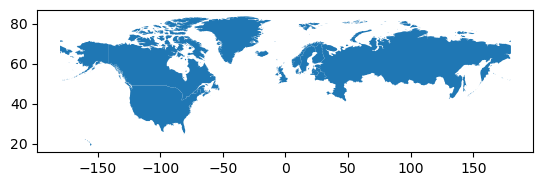

In [26]:
df.plot()

In [7]:
# Check geometries 
df.geom_type

0     MultiPolygon
1     MultiPolygon
2     MultiPolygon
3     MultiPolygon
4     MultiPolygon
5     MultiPolygon
6          Polygon
7          Polygon
8     MultiPolygon
9     MultiPolygon
10    MultiPolygon
11    MultiPolygon
12    MultiPolygon
13    MultiPolygon
14         Polygon
dtype: object

It seems that the majority of the geometries are multipolygon while 3 are type polygon. 

In [27]:
def check_polygons(shapes):
    if shapes.geom_type.unique()[0] == 'Polygon' and len(shapes.geom_type.unique()) == 1:
            print(f"All features are polygons")
    else: 
        print(f"multiple feature types:". shapes.geom_type.unique().tolist())

In [28]:
check_polygons(df)

All features are polygons


## Explode polygons 


In [24]:
df = df.explode(index_parts=False).reset_index()

In [25]:
df.geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
476    Polygon
477    Polygon
478    Polygon
479    Polygon
480    Polygon
Length: 481, dtype: object

In [29]:
check_polygons(df)

All features are polygons


## Compute minimum y-coordinate for polygons

In [31]:
type(df.iloc[[0]])

# Doing double brackets makes it a list of a list (dataframe)

geopandas.geodataframe.GeoDataFrame

In [32]:
df.iloc[[0]]['geometry']

0    POLYGON ((-132.74687 56.52568, -132.75762 56.5...
Name: geometry, dtype: geometry

In [33]:
type(df.iloc[[0]]['geometry'])

geopandas.geoseries.GeoSeries

In [38]:
df.iloc[[0]]['geometry'].bounds["miny"]

0    56.511035
Name: miny, dtype: float64

In [39]:
def min_y(geodf_row):
    return geodf_row.geometry.bounds[1]

In [41]:
df["miny"] = df.apply(min_y, axis=1)

df

,index,admin,country,n_communities,geometry,miny
0,0,United States of America,US,115,"POLYGON ((-132.74687 56.52568, -132.75762 56.5...",56.511035
1,0,United States of America,US,115,"POLYGON ((-132.77988 56.24727, -132.83096 56.2...",56.244141
2,0,United States of America,US,115,"POLYGON ((-134.31274 58.22891, -134.31987 58.2...",58.204102
3,0,United States of America,US,115,"POLYGON ((-145.11851 60.33711, -145.15049 60.3...",60.312646
4,0,United States of America,US,115,"POLYGON ((-144.56563 59.81841, -144.61357 59.8...",59.812646
...,...,...,...,...,...,...
476,13,Canada,CA,7,"POLYGON ((-109.16641 67.98237, -109.05391 67.9...",67.878809
477,13,Canada,CA,7,"POLYGON ((-108.09272 67.00518, -107.96646 66.9...",66.857812
478,13,Canada,CA,7,"POLYGON ((-109.32314 67.99087, -109.36084 67.9...",67.987598
479,13,Canada,CA,7,"POLYGON ((-139.04312 69.57690, -139.12573 69.5...",69.539307


<Axes: >

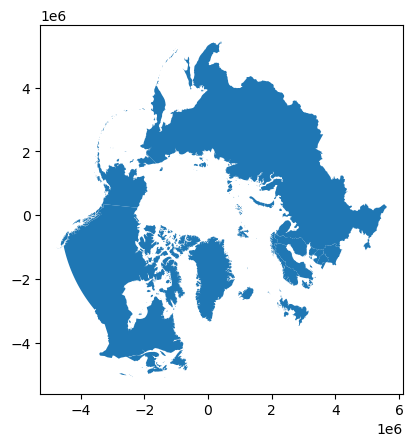

In [42]:
df[df['miny'] >=40]

df = df[df['miny'] >= 40].to_crs('EPSG:3413')
df.plot()